In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime
%matplotlib inline

In [20]:
df = pd.read_csv("final_game_data.csv")

In [21]:
df.head()

,user_id,first_name,last_name,email,gender,ip_address,country,pay_store,pay_amount,information_agree,first_login_date,pay_user_type,level,action_user_type,playtime,battle_pass_level,last_login_date,main_pay_item,pay_count
0,0a3e6ec7-0566-468c-a6b8-ae08484baeab,Tobe,Mallabar,tmallabari@wordpress.com,M,26.88.43.89,China,AOS,1202020.0,False,2021-05-23,heavy user,100.0,fishing,9996.17,20.0,2023-07-27,Levelup package,8.0
1,2aeee7a4-7e40-47e7-8d06-e24c2b869b62,Gerty,Pimlott,gpimlott97@is.gd,F,223.7.255.124,Sweden,AOS,1412096.0,True,2021-11-21,heavy user,100.0,raid,9995.47,20.0,2024-03-04,Gotcha package,7.0
2,40398eee-ae54-4929-8b2b-b3efce2bbe45,Clemence,Moncarr,cmoncarr6n@europa.eu,F,193.187.40.129,Japan,Other,1150450.0,True,2021-12-23,heavy user,99.0,fishing,9985.49,20.0,2024-03-14,Levelup package,6.0
3,19dee50f-ca43-4d9f-bbe4-de726f63255f,Nona,Satterlee,nsatterlee7i@census.gov,M,90.156.191.139,Thailand,Other,999731.0,False,2021-06-21,heavy user,99.0,fishing,9977.06,20.0,2023-11-25,Costume package,7.0
4,a0db93cd-876b-4156-9f9d-d5eec5a4c973,Juditha,Kilmary,jkilmarydw@imdb.com,M,138.30.116.15,Central African Republic,Other,1720862.0,True,2021-07-21,heavy user,99.0,fishing,9949.63,20.0,2023-06-30,Levelup package,5.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            1000 non-null   object 
 1   first_name         1000 non-null   object 
 2   last_name          1000 non-null   object 
 3   email              1000 non-null   object 
 4   gender             1000 non-null   object 
 5   ip_address         1000 non-null   object 
 6   country            1000 non-null   object 
 7   pay_store          1000 non-null   object 
 8   pay_amount         1000 non-null   float64
 9   information_agree  1000 non-null   bool   
 10  first_login_date   1000 non-null   object 
 11  pay_user_type      1000 non-null   object 
 12  level              1000 non-null   float64
 13  action_user_type   1000 non-null   object 
 14  playtime           1000 non-null   float64
 15  battle_pass_level  1000 non-null   float64
 16  last_login_date    1000 n

### last_login_date 전처리

In [23]:
# 날짜를 Unix timestamp로 변환
df['last_login_timestamp'] = pd.to_datetime(df['last_login_date']).astype(int) / 10**9  

In [24]:
df.head()

,user_id,first_name,last_name,email,gender,ip_address,country,pay_store,pay_amount,information_agree,first_login_date,pay_user_type,level,action_user_type,playtime,battle_pass_level,last_login_date,main_pay_item,pay_count,last_login_timestamp
0,0a3e6ec7-0566-468c-a6b8-ae08484baeab,Tobe,Mallabar,tmallabari@wordpress.com,M,26.88.43.89,China,AOS,1202020.0,False,2021-05-23,heavy user,100.0,fishing,9996.17,20.0,2023-07-27,Levelup package,8.0,1.690416e+09
1,2aeee7a4-7e40-47e7-8d06-e24c2b869b62,Gerty,Pimlott,gpimlott97@is.gd,F,223.7.255.124,Sweden,AOS,1412096.0,True,2021-11-21,heavy user,100.0,raid,9995.47,20.0,2024-03-04,Gotcha package,7.0,1.709510e+09
2,40398eee-ae54-4929-8b2b-b3efce2bbe45,Clemence,Moncarr,cmoncarr6n@europa.eu,F,193.187.40.129,Japan,Other,1150450.0,True,2021-12-23,heavy user,99.0,fishing,9985.49,20.0,2024-03-14,Levelup package,6.0,1.710374e+09
3,19dee50f-ca43-4d9f-bbe4-de726f63255f,Nona,Satterlee,nsatterlee7i@census.gov,M,90.156.191.139,Thailand,Other,999731.0,False,2021-06-21,heavy user,99.0,fishing,9977.06,20.0,2023-11-25,Costume package,7.0,1.700870e+09
4,a0db93cd-876b-4156-9f9d-d5eec5a4c973,Juditha,Kilmary,jkilmarydw@imdb.com,M,138.30.116.15,Central African Republic,Other,1720862.0,True,2021-07-21,heavy user,99.0,fishing,9949.63,20.0,2023-06-30,Levelup package,5.0,1.688083e+09


- 클러스터링에 이용할 컬럼만 따로 DataFrame 생성

In [25]:
clustering_df = df[['last_login_timestamp', 'level']]

# Clustering 

### 1. K-Means Clustering

In [26]:
from sklearn.cluster import KMeans

In [27]:
# K-Means 모델 생성 및 학습
kmeans = KMeans(n_clusters=5)

In [28]:
kmeans.fit(clustering_df)

KMeans(n_clusters=5)

In [29]:
# 클러스터 예측
clustering_df['kmeans_cluster'] = kmeans.predict(clustering_df)

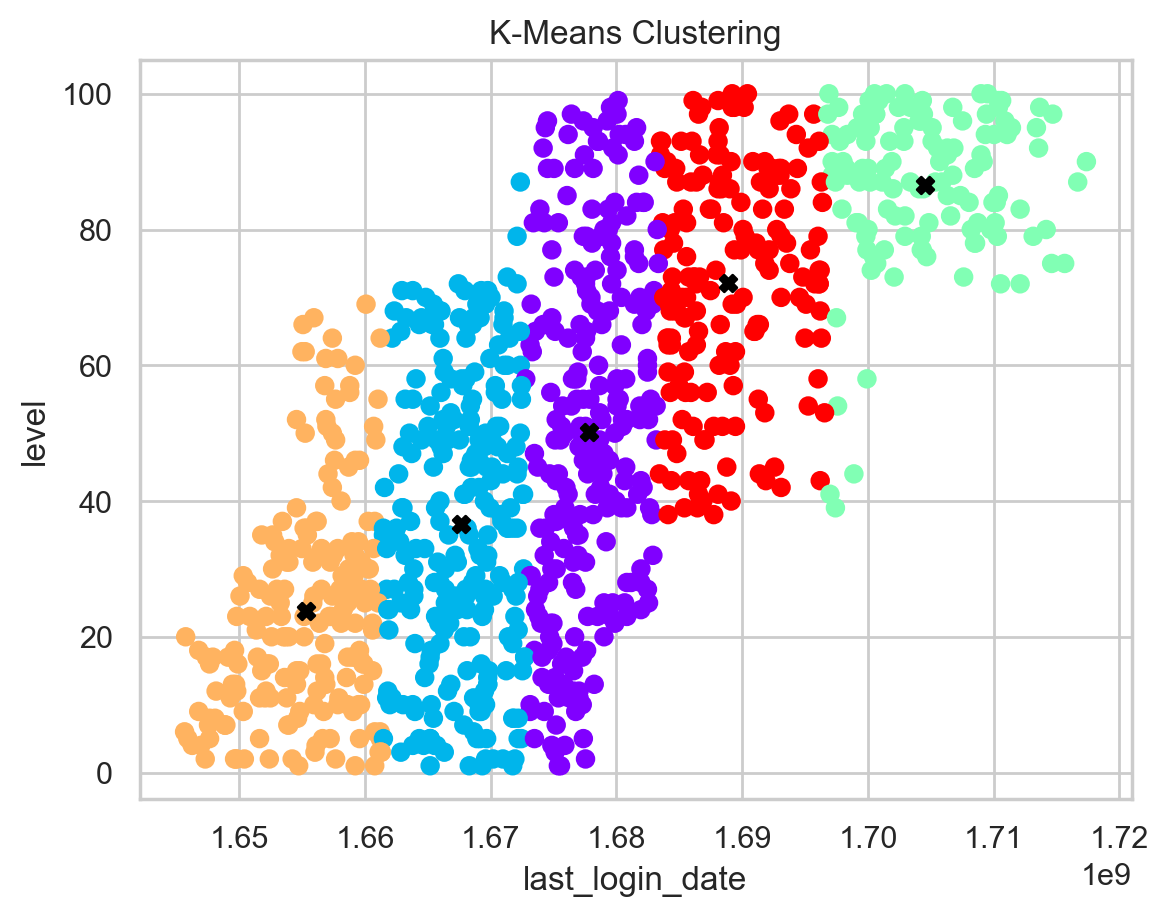

In [30]:
# 결과 시각화
plt.scatter(clustering_df['last_login_timestamp'], clustering_df['level'], c=clustering_df['kmeans_cluster'], cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='X')
plt.xlabel('last_login_date')
plt.ylabel('level')
plt.title('K-Means Clustering')
plt.show()

In [31]:
clustering_df.head()

,last_login_timestamp,level,kmeans_cluster
0,1.690416e+09,100.0,4
1,1.709510e+09,100.0,2
2,1.710374e+09,99.0,2
3,1.700870e+09,99.0,2
4,1.688083e+09,99.0,4


In [32]:
# clustering 결과값 기존 Dataframe과 합치기
df = pd.concat([df, clustering_df['kmeans_cluster']], axis=1)

In [33]:
# 아까 새로 생성했던 last_login_timestamp컬럼 삭제
df = df.drop('last_login_timestamp', axis=1)

In [34]:
df.head()

,user_id,first_name,last_name,email,gender,ip_address,country,pay_store,pay_amount,information_agree,first_login_date,pay_user_type,level,action_user_type,playtime,battle_pass_level,last_login_date,main_pay_item,pay_count,kmeans_cluster
0,0a3e6ec7-0566-468c-a6b8-ae08484baeab,Tobe,Mallabar,tmallabari@wordpress.com,M,26.88.43.89,China,AOS,1202020.0,False,2021-05-23,heavy user,100.0,fishing,9996.17,20.0,2023-07-27,Levelup package,8.0,4
1,2aeee7a4-7e40-47e7-8d06-e24c2b869b62,Gerty,Pimlott,gpimlott97@is.gd,F,223.7.255.124,Sweden,AOS,1412096.0,True,2021-11-21,heavy user,100.0,raid,9995.47,20.0,2024-03-04,Gotcha package,7.0,2
2,40398eee-ae54-4929-8b2b-b3efce2bbe45,Clemence,Moncarr,cmoncarr6n@europa.eu,F,193.187.40.129,Japan,Other,1150450.0,True,2021-12-23,heavy user,99.0,fishing,9985.49,20.0,2024-03-14,Levelup package,6.0,2
3,19dee50f-ca43-4d9f-bbe4-de726f63255f,Nona,Satterlee,nsatterlee7i@census.gov,M,90.156.191.139,Thailand,Other,999731.0,False,2021-06-21,heavy user,99.0,fishing,9977.06,20.0,2023-11-25,Costume package,7.0,2
4,a0db93cd-876b-4156-9f9d-d5eec5a4c973,Juditha,Kilmary,jkilmarydw@imdb.com,M,138.30.116.15,Central African Republic,Other,1720862.0,True,2021-07-21,heavy user,99.0,fishing,9949.63,20.0,2023-06-30,Levelup package,5.0,4


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            1000 non-null   object 
 1   first_name         1000 non-null   object 
 2   last_name          1000 non-null   object 
 3   email              1000 non-null   object 
 4   gender             1000 non-null   object 
 5   ip_address         1000 non-null   object 
 6   country            1000 non-null   object 
 7   pay_store          1000 non-null   object 
 8   pay_amount         1000 non-null   float64
 9   information_agree  1000 non-null   bool   
 10  first_login_date   1000 non-null   object 
 11  pay_user_type      1000 non-null   object 
 12  level              1000 non-null   float64
 13  action_user_type   1000 non-null   object 
 14  playtime           1000 non-null   float64
 15  battle_pass_level  1000 non-null   float64
 16  last_login_date    1000 n

In [42]:
df.groupby('kmeans_cluster')['playtime'].mean()

kmeans_cluster
0    5377.333506
1    3997.283557
2    8742.257619
3    2728.207436
4    7444.417143
Name: playtime, dtype: float64

In [43]:
df.groupby('kmeans_cluster')['last_login_date'].max()

kmeans_cluster
0    2023-05-06
1    2023-01-03
2    2024-06-03
3    2022-08-24
4    2023-10-06
Name: last_login_date, dtype: object

In [46]:
df.groupby('kmeans_cluster')['last_login_date'].min()

kmeans_cluster
0    2023-01-04
1    2022-08-26
2    2023-10-09
3    2022-02-24
4    2023-05-07
Name: last_login_date, dtype: object

In [44]:
df.groupby('kmeans_cluster')['level'].max()

kmeans_cluster
0     99.0
1     87.0
2    100.0
3     69.0
4    100.0
Name: level, dtype: float64

In [45]:
df.groupby('kmeans_cluster')['level'].min()

kmeans_cluster
0     1.0
1     1.0
2    39.0
3     1.0
4    38.0
Name: level, dtype: float64

#### clustering 결과값
- 2: 초록색 - platinum
- 4: 빨간색 - gold
- 0: 보라색 - silver
- 1: 하늘색 - bronze
- 3: 노란색 - iron

In [53]:
def conv_cluster(x):
    if x == 0:
        return 'silver'
    elif x == 1:
        return 'bronze'
    elif x == 2:
        return 'platinum'
    elif x == 3:
        return 'iron'
    else :
        return 'gold'

In [55]:
df['kmeans_cluster'] = df['kmeans_cluster'].apply(conv_cluster)

In [57]:
def conv_info(x):
    if x == True:
        return '동의'
    else :
        return '비동의'

In [59]:
df['information_agree'] = df['information_agree'].apply(conv_info)

In [60]:
df

,user_id,first_name,last_name,email,gender,ip_address,country,pay_store,pay_amount,information_agree,first_login_date,pay_user_type,level,action_user_type,playtime,battle_pass_level,last_login_date,main_pay_item,pay_count,kmeans_cluster
0,0a3e6ec7-0566-468c-a6b8-ae08484baeab,Tobe,Mallabar,tmallabari@wordpress.com,M,26.88.43.89,China,AOS,1202020.0,비동의,2021-05-23,heavy user,100.0,fishing,9996.17,20.0,2023-07-27,Levelup package,8.0,gold
1,2aeee7a4-7e40-47e7-8d06-e24c2b869b62,Gerty,Pimlott,gpimlott97@is.gd,F,223.7.255.124,Sweden,AOS,1412096.0,동의,2021-11-21,heavy user,100.0,raid,9995.47,20.0,2024-03-04,Gotcha package,7.0,platinum
2,40398eee-ae54-4929-8b2b-b3efce2bbe45,Clemence,Moncarr,cmoncarr6n@europa.eu,F,193.187.40.129,Japan,Other,1150450.0,동의,2021-12-23,heavy user,99.0,fishing,9985.49,20.0,2024-03-14,Levelup package,6.0,platinum
3,19dee50f-ca43-4d9f-bbe4-de726f63255f,Nona,Satterlee,nsatterlee7i@census.gov,M,90.156.191.139,Thailand,Other,999731.0,비동의,2021-06-21,heavy user,99.0,fishing,9977.06,20.0,2023-11-25,Costume package,7.0,platinum
4,a0db93cd-876b-4156-9f9d-d5eec5a4c973,Juditha,Kilmary,jkilmarydw@imdb.com,M,138.30.116.15,Central African Republic,Other,1720862.0,동의,2021-07-21,heavy user,99.0,fishing,9949.63,20.0,2023-06-30,Levelup package,5.0,gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3be8d0c5-df08-42aa-b86c-18d7689c8231,Carny,Probert,cprobertd7@ovh.net,M,26.187.103.32,Moldova,Other,0.0,동의,2021-08-23,heavy user,1.0,raid,48.78,0.0,2022-10-08,NaN,0.0,bronze
996,199abedb-6efc-4e49-b282-24ae6ac5f522,Perl,Yurchenko,pyurchenkof1@soup.io,F,206.51.116.54,Indonesia,Other,0.0,동의,2021-03-24,heavy user,1.0,raid,44.20,0.0,2022-06-09,NaN,0.0,iron
997,f83bcaab-5eb4-48ce-a8b3-1dffc8117eb6,Deonne,Reynolds,dreynoldsia@jugem.jp,F,49.178.110.76,Japan,Other,0.0,비동의,2021-09-22,heavy user,1.0,fishing,22.48,0.0,2022-11-25,NaN,0.0,bronze
998,04353c9e-6b03-45c9-a932-0adf6308631b,Marya,Catlow,mcatlowpx@merriam-webster.com,F,41.13.29.47,Brazil,AOS,0.0,비동의,2021-10-21,heavy user,1.0,pvp,12.92,0.0,2022-12-23,NaN,0.0,bronze


In [61]:
# df.to_csv('clustered_game_data.csv', index=False, encoding='utf-8')